In [44]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from fbprophet import Prophet


In [45]:
# get matplotlib to recognize installed fonts
font_objects = mpl.font_manager.createFontList(mpl.font_manager.findSystemFonts()) # font_names = [f.name for f in font_objects]
mpl.font_manager.fontManager.ttflist = font_objects 
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*2

INFO:matplotlib.font_manager:Could not open font file /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf


In [46]:
# DIA
usaf = "725650"
wban = "03017"

# Telluride
#usaf = "724627"
#wban = "03011"

In [50]:
# Load all processed counts

files = [
    "%s-%s-data.csv.gz" % (usaf, wban),
]

dtypes = [
    ('timestamp', 'U'),
    ('temp', 'f')
]

filled = False
df = None
for file in files:
    frame = pd.read_csv(
        file,
        header=None,
        names=["timestamp", "temp"],
        dtype=dtypes,
        compression="gzip"
    )
    frame['timestamp'] = pd.to_datetime(frame['timestamp'],format='%Y%m%d%H%M')
    if not filled:
        df = frame
        filled = True
    else:
        df = df.append(frame)
df.set_index('timestamp', inplace=True)
df.head().append(df.tail())


,temp
timestamp,
1994-07-18 07:00:00,21.600000
1994-07-19 18:00:00,26.600000
1994-07-19 19:00:00,28.299999
1994-07-19 20:00:00,29.400000
1994-07-19 21:00:00,31.100000
2019-08-11 20:46:00,24.400000
2019-08-11 20:53:00,23.299999
2019-08-11 21:00:00,23.299999
2019-08-11 21:09:00,22.200001


In [51]:
# Uncomment if you want to convert Celcius to Fahrenheit
df['temp'] = df['temp'] * 9 / 5 + 32
df.head().append(df.tail())


,temp
timestamp,
1994-07-18 07:00:00,70.880005
1994-07-19 18:00:00,79.880005
1994-07-19 19:00:00,82.940002
1994-07-19 20:00:00,84.919998
1994-07-19 21:00:00,87.979996
2019-08-11 20:46:00,75.919998
2019-08-11 20:53:00,73.940002
2019-08-11 21:00:00,73.940002
2019-08-11 21:09:00,71.959999


In [17]:
# create days max resampling
days_max = df.resample('1440T').max().dropna()
days_max.head().append(days_max.tail())

,temp
timestamp,
1994-07-18,70.880005
1994-07-19,87.979996
1994-07-20,74.839996
1994-07-21,86.000000
1994-07-22,95.900002
2019-08-07,91.939995
2019-08-08,87.979996
2019-08-09,91.039993
2019-08-10,84.020004


In [18]:
# create days min resampling
days_min = df.resample('1440T').min().dropna()
days_min.head().append(days_min.tail())

,temp
timestamp,
1994-07-18,70.880005
1994-07-19,79.880005
1994-07-20,59.000000
1994-07-21,55.940002
1994-07-22,59.900002
2019-08-07,68.000000
2019-08-08,64.040001
2019-08-09,64.040001
2019-08-10,62.959999


In [19]:
# create days mean resampling
days_mean = df.resample('1440T').mean().dropna()
days_mean.head().append(days_mean.tail())

,temp
timestamp,
1994-07-18,70.880005
1994-07-19,84.440002
1994-07-20,65.793045
1994-07-21,69.095001
1994-07-22,75.121735
2019-08-07,78.974373
2019-08-08,69.886253
2019-08-09,74.433716
2019-08-10,75.379997


In [38]:
frame = days_max.reset_index()[['timestamp', 'temp']]
frame.columns = ['ds', 'y']

frame.head().append(frame.tail())

,ds,y
0,1994-07-18,70.880005
1,1994-07-19,87.979996
2,1994-07-20,74.839996
3,1994-07-21,86.000000
4,1994-07-22,95.900002
9019,2019-08-07,91.939995
9020,2019-08-08,87.979996
9021,2019-08-09,91.039993
9022,2019-08-10,84.020004
9023,2019-08-11,82.940002


In [39]:
m = Prophet(
    weekly_seasonality=False
)
m.fit(frame)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
future = m.make_future_dataframe(periods=367)
future.head().append(future.tail())

,ds
0,1994-07-18
1,1994-07-19
2,1994-07-20
3,1994-07-21
4,1994-07-22
9386,2020-08-08
9387,2020-08-09
9388,2020-08-10
9389,2020-08-11
9390,2020-08-12


In [41]:
forecast = m.predict(future)
forecast.head().append(forecast.tail())

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,yhat
0,1994-07-18,62.970932,62.970932,62.970932,74.488106,100.738700,24.763996,24.763996,24.763996,0.0,0.0,0.0,24.763996,24.763996,24.763996,87.734928
1,1994-07-19,62.972084,62.972084,62.972084,74.395595,101.626010,24.689230,24.689230,24.689230,0.0,0.0,0.0,24.689230,24.689230,24.689230,87.661314
2,1994-07-20,62.973236,62.973236,62.973236,73.229281,101.014129,24.595450,24.595450,24.595450,0.0,0.0,0.0,24.595450,24.595450,24.595450,87.568686
3,1994-07-21,62.974388,62.974388,62.974388,73.356538,101.552705,24.484111,24.484111,24.484111,0.0,0.0,0.0,24.484111,24.484111,24.484111,87.458499
4,1994-07-22,62.975540,62.975540,62.975540,74.527715,101.238228,24.356858,24.356858,24.356858,0.0,0.0,0.0,24.356858,24.356858,24.356858,87.332398
9386,2020-08-08,66.653072,66.643741,66.666449,74.898713,102.427262,21.716359,21.716359,21.716359,0.0,0.0,0.0,21.716359,21.716359,21.716359,88.369431
9387,2020-08-09,66.653208,66.643799,66.666671,73.691451,101.565928,21.646957,21.646957,21.646957,0.0,0.0,0.0,21.646957,21.646957,21.646957,88.300166
9388,2020-08-10,66.653344,66.643820,66.666893,74.731185,101.633315,21.591145,21.591145,21.591145,0.0,0.0,0.0,21.591145,21.591145,21.591145,88.244490
9389,2020-08-11,66.653480,66.643842,66.667119,75.391068,103.377355,21.548130,21.548130,21.548130,0.0,0.0,0.0,21.548130,21.548130,21.548130,88.201610
9390,2020-08-12,66.653616,66.643915,66.667346,74.688016,102.183962,21.516786,21.516786,21.516786,0.0,0.0,0.0,21.516786,21.516786,21.516786,88.170402


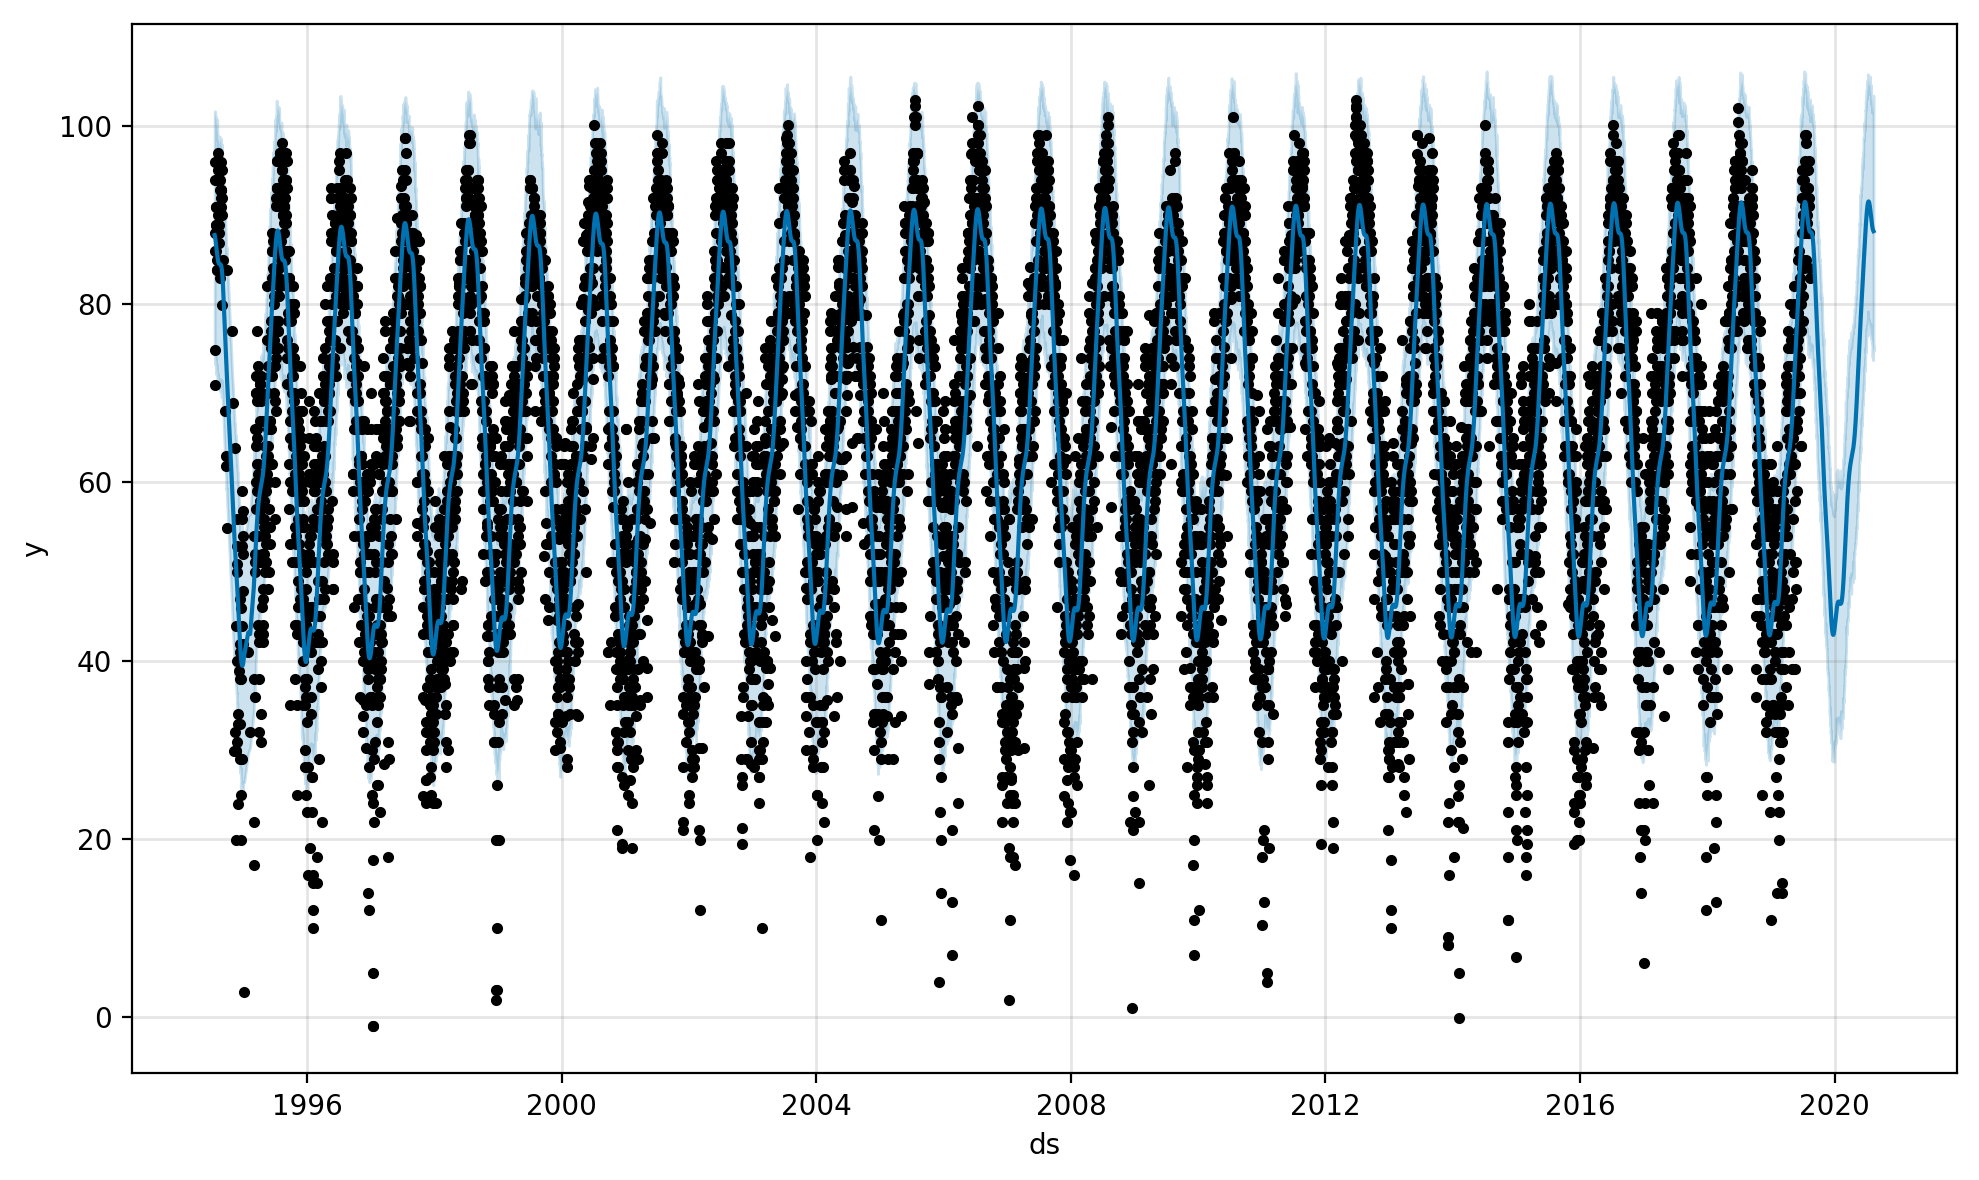

In [42]:
pd.plotting.register_matplotlib_converters()
fig = m.plot(forecast)

<Figure size 2000x1200 with 0 Axes>

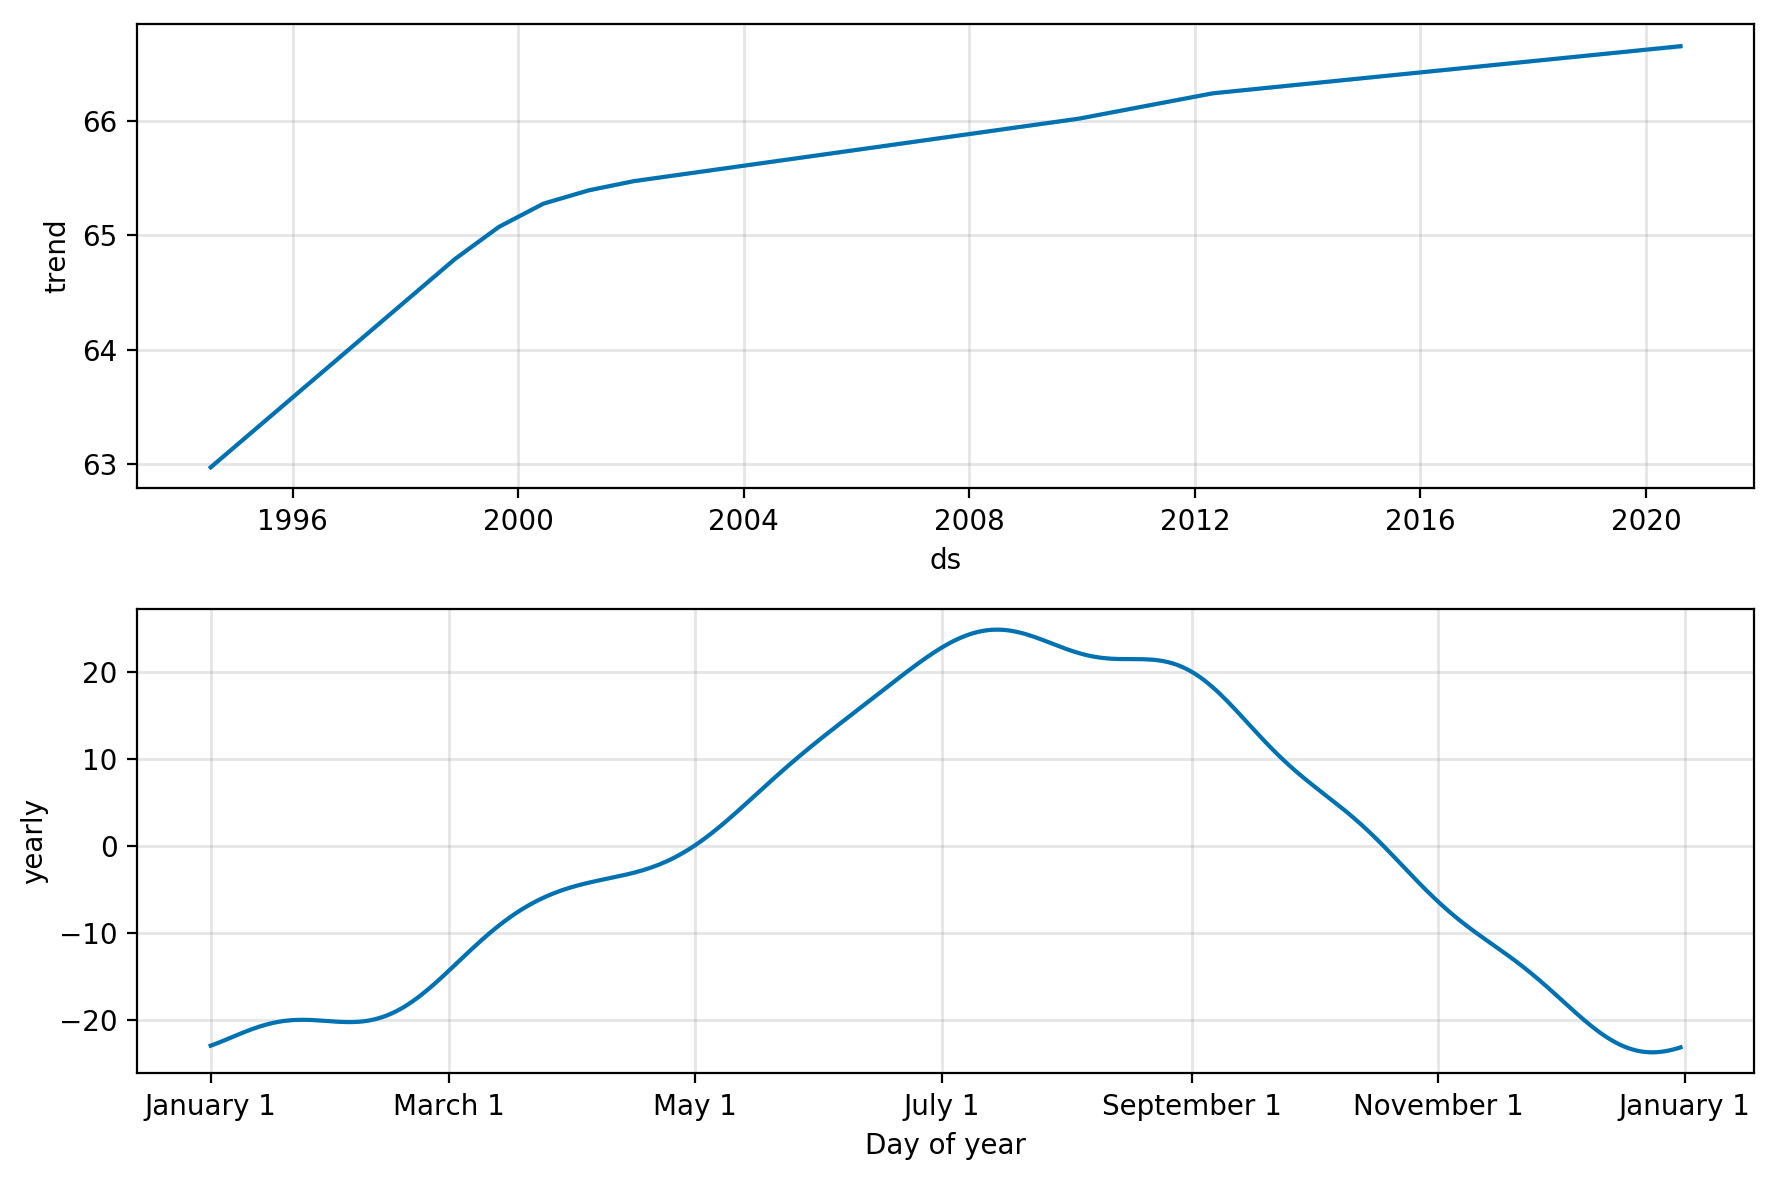

In [43]:
deltas = (([100]*len(m.changepoints)+m.params['delta'].mean(0))/100)**12-[1]*len(m.changepoints)
fig = plt.figure(facecolor='w', figsize=(10, 6))
fig.tight_layout()
yoy_rates = [(a - b)/b for a, b in zip(forecast['trend'].tail(1000), forecast['trend'].tail(1365).head(1000))]
m.plot_components(forecast,plot_cap=False);
